In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63307_Z')

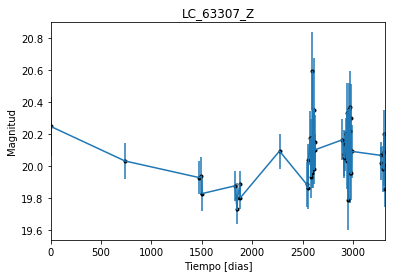

In [3]:
data = np.genfromtxt('LC_63307_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63307_Z')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

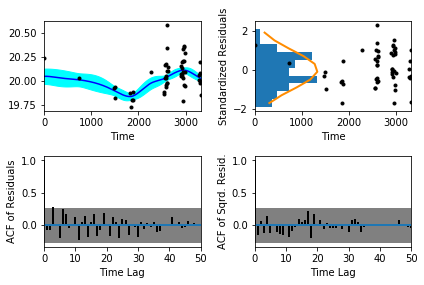

In [6]:
sample.assess_fit()

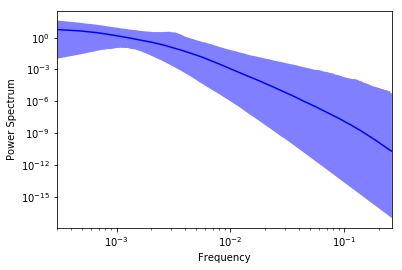

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63307_Z')

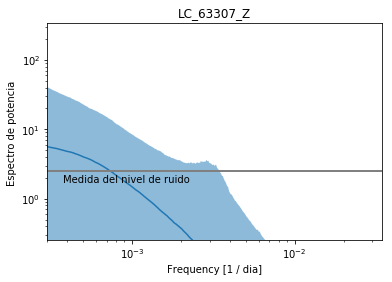

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63307_Z')

Text(0.5,1,'Prediccion , valor esperado LC_63307_Z')

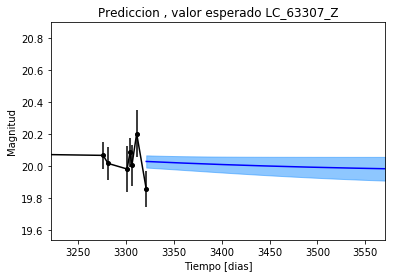

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63307_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63307_Z')

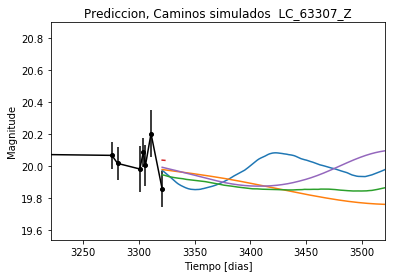

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63307_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63307_Z')

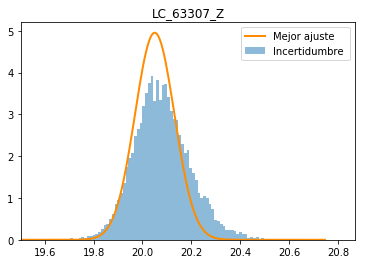

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63307_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_Z')

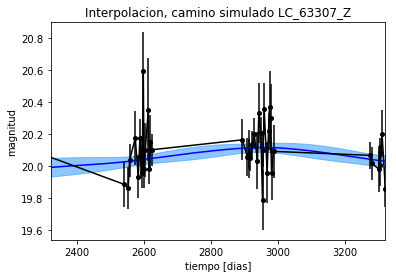

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_Z')

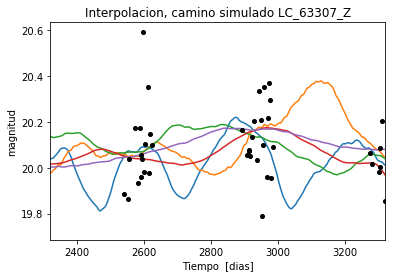

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 524.984029515
Median: 0.0060944572743
Standard deviation: 0.112384362828
68% credibility interval: [ 0.00058906  0.12439173]
95% credibility interval: [  3.25881408e-04   4.23985908e-01]
99% credibility interval: [  3.05343024e-04   5.05652239e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 546.652748008
Median: 0.00113662545618
Standard deviation: 0.0413430092095
68% credibility interval: [ 0.00039997  0.01137186]
95% credibility interval: [ 0.00031285  0.10606931]
99% credibility interval: [  3.02974381e-04   3.45442920e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 485.101325874
Median: 0.0102517051696
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 836.926711165
Median: 57.0218356708
Standard deviation: 1.5470473634
68% credibility interval: [ 55.27343948  58.10488754]
95% credibility interval: [ 52.85524538  58.65180895]
99% credibility interval: [ 50.82004902  59.14952188]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 358.578850905
Median: 0.370292800443
Standard deviation: 1.15362837856
68% credibility interval: [ 0.03799409  2.16463395]
95% credibility interval: [ 0.01196858  3.87107989]
99% credibility interval: [ 0.00935817  5.07318494]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 324.518967168
Median: 0.0787664092721
Standard deviation: 2.24347630717
68% credibility interval: [ 0.00313112  1.47181199]
95% credibility interval: [  2.96993834e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20026.5200859
Median: 2.2330666305e-17
Standard deviation: 1.46410395142e+64
68% credibility interval: [  7.02855386e-41   5.84087357e+15]
95% credibility interval: [  1.75107623e-75   6.16117729e+48]
99% credibility interval: [  2.23278367e-95   2.63139681e+57]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2077.91017266
Median: 20.007487971
Standard deviation: 0.0689337153231
68% credibility interval: [ 19.95746063  20.06294943]
95% credibility interval: [ 19.87827302  20.15393198]
99% credibility interval: [ 19.78429036  20.26395963]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 543.733010508
Median: 0.00130731254064
Standard deviation: 0.11261544212
68% credibility interval: [ 0.         0.1120155]
95% credibility interval: [ 0.          0.43300598]
99% credibility interval: [ 0.          0.50029245]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 543.733010508
Median: 0.00130731254064
Standard deviation: 0.11261544212
68% credibility interval: [ 0.         0.1120155]
95% credibility interval: [ 0.          0.43300598]
99% credibility interval: [ 0.          0.50029245]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 763.040404221
Median: 0.0
Standard deviation: 0.000782340282924
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 836.926711165
Median: 57.0218356708
Standard deviation: 1.5470473634
68% credibility interval: [ 55.27343948  58.10488754]
95% credibility interval: [ 52.85524538  58.65180895]
99% credibility interval: [ 50.82004902  59.14952188]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1094.72668897
Median: 0.0131856844264
Standard deviation: 0.0202317984993
68% credibility interval: [ 0.00696604  0.02721368]
95% credibility interval: [ 0.00373793  0.06726245]
99% credibility interval: [ 0.00254531  0.12585814]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2514.09286293
Median: 0.89957424472
Standard deviation: 0.133143789653
68% credibility interval: [ 0.78282127  1.04084311]
95% credibility interval: [ 0.68998154  1.20767951]
99% credibility interval: [ 0.64077585  1.34411915]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 784.951344381
Median: 5.75581812074e-06
Standard deviation: 0.0166066909639
68% credibility interval: [  1.33338253e-20   3.54551497e-04]
95% credibility interval: [  2.05294430e-53   7.69382659e-03]
99% credibility interval: [  9.90532313e-63   9.28120737e-02]


In [26]:
sample.posterior_summaries('ar_roots')


Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 524.984029515
Median: (-0.0382926044011+0j)
Standard deviation: 0.999648321693
68% credibility interval: [-0.78157628+0.j -0.00370118+0.j]
95% credibility interval: [ -2.66398202e+00+0.j          -2.04757327e-03-0.00084865j]
99% credibility interval: [ -3.17710672e+00+0.j          -1.91852680e-03-0.01875744j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 546.652748008
Median: (-0.00714162836601+0.0165338542391j)
Standard deviation: 0.753759208772
68% credibility interval: [-0.07145151+0.30226939j -0.00251310+0.j        ]
95% credibility interval: [-0.66645315+0.00916182j -0.00196572+0.j        ]
99% credibility interval: [ -2.17048188e+00+1.57686319j  -1.90364418e-03+0.j        ]
Posterior summary for parameter ar_ro